**Infromations :**

-----




Name : Lamia AL-Shahrani


-------------
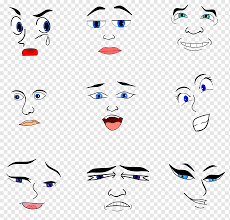
ـــــــــ
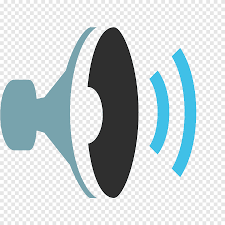

The goal of the assignment is to implement a **multilabel classification model** using two datasets: one containing facial expressions and the other containing speech emotions. Each record in the dataset has two labels: one representing the facial emotion and another representing the speech emotion. The model should predict both of these emotions simultaneously for each record.

To summarize:
- **Objective:** Build a multilabel classification model.
- **Data Sources:** Two datasets — facial expressions and speech emotions.

(/content/student_1_combined_data.xlsx)
- **Task:** Predict both facial and speech emotions as separate labels for each instance in the dataset.

--------

* Environment settings

In [ ]:
!pip install pandas scikit-learn



- **`!pip install`**: Used to install packages in environments like Jupyter or Google Colab.
- **`--upgrade`**: Ensures the libraries are updated to the latest available versions if they are already installed.
- **`pandas`**: A powerful library for data analysis.
- **`scikit-learn`**: A library specialized in machine learning algorithms.

This command follows best practices for working with Python, ensuring you get the most up-to-date versions of the libraries.

#  (Exploratory Data Analysis - EDA)

* Load the dataset

In [ ]:
import pandas as pd
from tabulate import tabulate

# Function to load data from an Excel file
def load_data(file_path):
    return pd.read_excel(file_path)

# Function to preview the data in a structured format
def preview_data(data):
    print(" ---Preview the Dataset--- ")
    print(tabulate(data.head(), headers='keys', tablefmt='pretty', showindex=False))

# Function to display general information about the data
def display_data_info(data):
    data.info(" ---INFROMATION Data--- ")

# Function to show descriptive statistics for numeric columns
def display_descriptive_stats(data):
    print("--- Descriptive Statistics ---")
    print(data.describe())

# Function to check for missing values in the dataset
def check_missing_values(data):
    print("--- Missing Values ---")
    print(data.isnull().sum())

# Function to check for duplicate rows in the dataset
def check_duplicates(data):
    print("--- Duplicate Rows ---")
    print(data.duplicated().sum())

# Function to display the shape of the dataset (number of rows and columns)
def display_data_shape(data):
    print(f"--- Dataset Shape ---: {data.shape}")

# Function to perform Exploratory Data Analysis (EDA)
def exploratory_data_analysis(data):
    preview_data(data)
    display_data_info(data)
    display_descriptive_stats(data)
    check_missing_values(data)
    check_duplicates(data)
    display_data_shape(data)

# Load data from the file
data = load_data("/content/student_1_combined_data.xlsx")

# Perform Exploratory Data Analysis (EDA)
exploratory_data_analysis(data)

print("Exploratory Data Analysis (EDA) completed.")



 ---Preview the Dataset--- 
+---------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------------+-----------------------+
|        Time         |    face_neutral    |      face_sad      |     face_angry     |     face_happy     |     face_fear      |    face_disgust    |   face_surprise    |   speech_neutral   |     speech_sad     |    speech_angry    |    speech_happy    |    speech_fear     |   speech_disgust   |  speech_surprise   | speech_Dominant_Emotion | face_Dominant_Emotion |
+---------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---

---  Dataset Preview Summary --- :

The dataset consists of **483 rows** and **17 columns**, capturing facial and speech emotions over time.

- **Time**: Timestamp of each observation.
- **Emotions**: Intensity of 7 facial and 7 speech emotions (e.g., neutral, sad, angry, happy, etc.) represented as float values between 0 and 1.
- **Dominant Emotions**: Columns for `speech_Dominant_Emotion` and `face_Dominant_Emotion` indicate the most prominent emotion detected in speech and facial expressions.

#### Key Insights:
- **No missing values** or **duplicate entries**.
- **Shape**: 483 rows, 17 columns.
- **Descriptive Stats**: Emotion intensity averages are generally low, with higher values observed for "disgust" and "fear".

### Conclusion:
This well-structured dataset is free from missing or duplicate data, making it ready for exploratory analysis or emotion detection modeling.

----

#"Data Preparation: Feature Extraction and Early Fusion of Facial and Speech Data"

   * Description :

Extract features from both facial expressions and speech, then perform early fusion (combine) of the datasets.

**When is the merging done?**

The merging occurs during the data preparation phase, before using the data to train the model or conduct analysis. Features from each source (such as face and speech) can be merged in a single step to provide the model with a rich set of data for analysis.

In [ ]:
# Extract features
features = data[[
    'face_neutral', 'face_happy', 'face_sad', 'face_angry', 'face_fear', 'face_disgust', 'face_surprise',
    'speech_neutral', 'speech_sad', 'speech_angry', 'speech_happy', 'speech_fear', 'speech_disgust', 'speech_surprise'
]]

# Extract labels
labels = data[['face_Dominant_Emotion', 'speech_Dominant_Emotion']]

# Merge face and speech features into one dataset
merged_features = pd.concat([features.iloc[:, :7], features.iloc[:, 7:]], axis=1)

# Print the merged features
print(merged_features.head())
print(labels.head())


   face_neutral  face_happy  face_sad  face_angry  face_fear  face_disgust  \
0      0.009329    0.073267  0.124372    0.118944   0.058155      0.561585   
1      0.285486    0.256896  0.009639    0.060090   0.080962      0.290520   
2      0.310899    0.079325  0.131060    0.032019   0.258367      0.070936   
3      0.314280    0.045281  0.036389    0.502896   0.010363      0.043497   
4      0.094396    0.435910  0.062472    0.025317   0.027762      0.210598   

   face_surprise  speech_neutral  speech_sad  speech_angry  speech_happy  \
0       0.054349        0.166976    0.001579      0.234088      0.103837   
1       0.016407        0.305592    0.176375      0.094754      0.012222   
2       0.117396        0.141075    0.263970      0.215350      0.204763   
3       0.047294        0.013229    0.077948      0.032691      0.284778   
4       0.143545        0.017354    0.017553      0.337565      0.023691   

   speech_fear  speech_disgust  speech_surprise  
0     0.098004        0.

**Objective of the steps:**

The objective of these steps is to **prepare the data** properly for training a classification model capable of identifying emotions using facial and speech features.

### 1. **Feature Extraction:**
   - **Task:** Extract emotions from facial and speech data, such as "happy", "angry", "sad", etc.
   - **Importance:** Converts raw data into usable features for the model.

### 2. **Label Extraction:**
   - **Task:** Extract the dominant emotion for both face and speech data.
   - **Importance:** These labels are used to train the model to classify emotions.

### 3. **Early Feature Merging:**
   - **Task:** Merge the facial and speech features into one dataset.
   - **Importance:** Provides rich data for the model, helping to classify emotions more accurately.

### **Main Benefit:**  
Early merging enhances **classification accuracy** by providing the model with information from both sources (face and speech), allowing it to better understand emotions.

---

**Summary:**  
These steps are crucial for preparing the data properly to train a classification model that can accurately identify emotions by merging facial and speech data.

# Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encoding the label columns
le_face = LabelEncoder()
le_speech = LabelEncoder()

# Encoding the dominant emotions in face and speech
labels['face_Dominant_Emotion'] = le_face.fit_transform(labels['face_Dominant_Emotion'])
labels['speech_Dominant_Emotion'] = le_speech.fit_transform(labels['speech_Dominant_Emotion'])

# Display the data after encoding
print(labels.head())



   face_Dominant_Emotion  speech_Dominant_Emotion
0                      1                        1
1                      1                        1
2                      4                        5
3                      0                        2
4                      3                        0


<ipython-input-13-db133e0c445a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels['face_Dominant_Emotion'] = le_face.fit_transform(labels['face_Dominant_Emotion'])
<ipython-input-13-db133e0c445a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels['speech_Dominant_Emotion'] = le_speech.fit_transform(labels['speech_Dominant_Emotion'])


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




* Label Encoding :



LabelEncoder is used to convert categorical string labels (e.g., 'happy', 'sad', 'neutral') into integer values (e.g., 0, 1, 2). This prepares the categorical data for machine learning algorithms, which work with numerical data.



* Scaling Features :



StandardScaler normalizes the data by removing the mean and scaling to unit variance. This ensures that all features are on a comparable scale, which is particularly important for models like SVM or KNN that rely on distances between feature vectors.

-------------

# Model Building and Training: Development and Fitting of the Model

* Splitting the data into training and testing set

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Display the size of the training and test sets
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 386
Test set size: 97


The training set consists of 386 samples, while the test set contains 97 samples.

*  Model building and training

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

# Build Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Use MultiOutputClassifier for multi-label classification
multi_target_rf = MultiOutputClassifier(rf)

# Train the model using the training data
multi_target_rf.fit(X_train, y_train)



MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42))



The Random Forest algorithm is employed, which aggregates multiple decision trees to make predictions.
Each tree in the forest splits the data based on various features until a classification is reached. The final classification is determined by a majority vote among the trees, with the class receiving the most votes being selected as the final decision. In this model, the number of trees is set to 100 (`n_estimators=100`), which improves model accuracy and ensures robust generalization on unseen test data.

Given the two types of input data (facial expressions and speech), early fusion is applied by merging the facial and speech features into a single unified dataset. This allows the model to process both sets of features simultaneously, enhancing its ability to learn the relationships between facial and speech data in a cohesive manner.

As the task involves multi-label classification, the `MultiOutputClassifier` is utilized. This wrapper enables the training of a single classifier using one algorithm (Random Forest in this case), while creating a separate model for each target variable (facial and speech expressions). This facilitates the prediction of multiple labels simultaneously, using the same algorithm for each output.

Finally, the model is trained using the merged dataset with the `fit(X_train, y_train)` method. Here, the model learns from both facial and speech features at once, enabling it to provide multi-label predictions for each data sample.

---

### Technical Advantages:
1. Random Forest offers high stability and accuracy by leveraging the majority vote mechanism across trees.
2. Early Fusion enables the model to use all features from both facial and speech data together, improving prediction accuracy.
3. `MultiOutputClassifier` efficiently handles multi-label tasks by training the model to predict multiple labels concurrently.


-----

## Forecasting and performance evaluation:

1. Cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(multi_target_rf, X_train_scaled, y_train, cv=5)
print(f"Cross-validation scores: {scores}")


Cross-validation scores: [0.80769231 0.81818182 0.80519481 0.87012987 0.76623377]


2. Evaluation Metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict emotions for the test set
y_pred = multi_target_rf.predict(X_test)

# Compute accuracy for face and speech
accuracy_face = accuracy_score(y_test['face_Dominant_Emotion'], y_pred[:, 0])
accuracy_speech = accuracy_score(y_test['speech_Dominant_Emotion'], y_pred[:, 1])

# Compute precision, recall, and F1-score for each class
precision_face = precision_score(y_test['face_Dominant_Emotion'], y_pred[:, 0], average='weighted', zero_division=1)
recall_face = recall_score(y_test['face_Dominant_Emotion'], y_pred[:, 0], average='weighted', zero_division=1)
f1_face = f1_score(y_test['face_Dominant_Emotion'], y_pred[:, 0], average='weighted')

precision_speech = precision_score(y_test['speech_Dominant_Emotion'], y_pred[:, 1], average='weighted', zero_division=1)
recall_speech = recall_score(y_test['speech_Dominant_Emotion'], y_pred[:, 1], average='weighted', zero_division=1)
f1_speech = f1_score(y_test['speech_Dominant_Emotion'], y_pred[:, 1], average='weighted', zero_division=1)

# Print the evaluation metrics
print(f"Accuracy (Face): {accuracy_face}")
print(f"Accuracy (Speech): {accuracy_speech}")
print(f"Precision (Face): {precision_face}, Recall (Face): {recall_face}, F1-Score (Face): {f1_face}")
print(f"Precision (Speech): {precision_speech}, Recall (Speech): {recall_speech}, F1-Score (Speech): {f1_speech}")


Accuracy (Face): 0.9175257731958762
Accuracy (Speech): 0.9072164948453608
Precision (Face): 0.9190942934499635, Recall (Face): 0.9175257731958762, F1-Score (Face): 0.9169294420678871
Precision (Speech): 0.9147665251667677, Recall (Speech): 0.9072164948453608, F1-Score (Speech): 0.907070707070707


3. Classification Report

In [ ]:
from sklearn.metrics import classification_report

# Generate classification reports for face and speech emotions
report_face = classification_report(y_test['face_Dominant_Emotion'], y_pred[:, 0], target_names=le_face.classes_)
print("Classification Report for Face Emotion:")
print(report_face)

report_speech = classification_report(y_test['speech_Dominant_Emotion'], y_pred[:, 1], target_names=le_speech.classes_)
print("Classification Report for Speech Emotion:")
print(report_speech)




Classification Report for Face Emotion:
              precision    recall  f1-score   support

       angry       0.90      0.90      0.90        10
     disgust       0.94      1.00      0.97        17
        fear       0.94      1.00      0.97        15
       happy       0.85      0.85      0.85        13
     neutral       1.00      0.87      0.93        15
         sad       0.91      0.83      0.87        12
    surprise       0.88      0.93      0.90        15

    accuracy                           0.92        97
   macro avg       0.92      0.91      0.91        97
weighted avg       0.92      0.92      0.92        97

Classification Report for Speech Emotion:
              precision    recall  f1-score   support

       angry       0.94      0.84      0.89        19
     disgust       0.91      0.91      0.91        11
        fear       0.80      1.00      0.89        12
       happy       0.88      1.00      0.93        14
     neutral       1.00      1.00      1.00       

4. Confusion Matrix

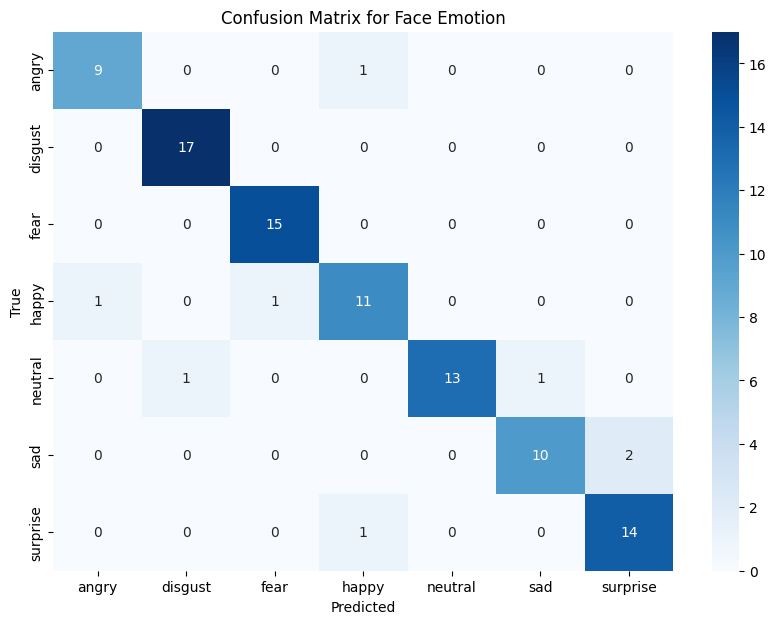

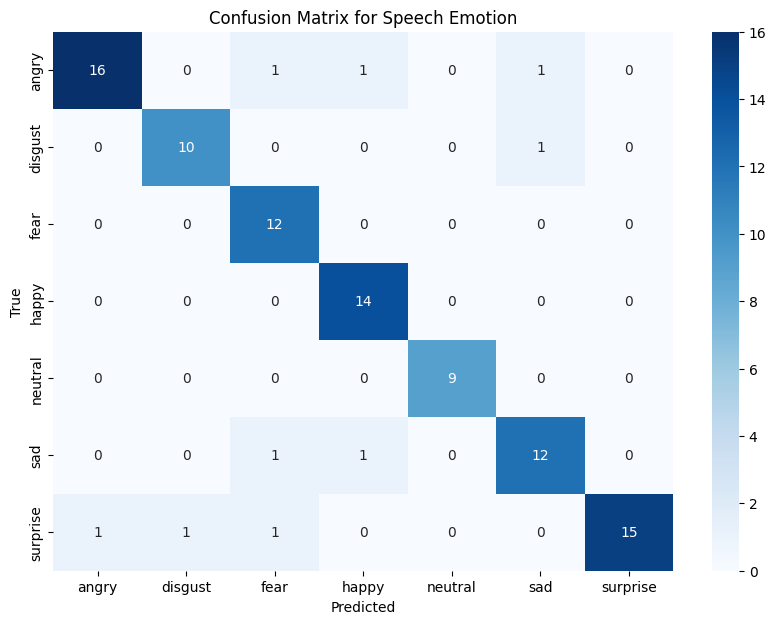

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train the classifiers for face and speech emotions
face_model = RandomForestClassifier(random_state=42)
face_model.fit(X_train, y_train['face_Dominant_Emotion'])
y_pred_face = face_model.predict(X_test)

speech_model = RandomForestClassifier(random_state=42)
speech_model.fit(X_train, y_train['speech_Dominant_Emotion'])
y_pred_speech = speech_model.predict(X_test)

# Generate confusion matrices for both face and speech emotions
face_cm = confusion_matrix(y_test['face_Dominant_Emotion'], y_pred_face)
speech_cm = confusion_matrix(y_test['speech_Dominant_Emotion'], y_pred_speech)

# Plot confusion matrices
plt.figure(figsize=(10, 7))
sns.heatmap(face_cm, annot=True, fmt="d", cmap="Blues", xticklabels=le_face.classes_, yticklabels=le_face.classes_)
plt.title("Confusion Matrix for Face Emotion")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

plt.figure(figsize=(10, 7))
sns.heatmap(speech_cm, annot=True, fmt="d", cmap="Blues", xticklabels=le_speech.classes_, yticklabels=le_speech.classes_)
plt.title("Confusion Matrix for Speech Emotion")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# Emotion Prediction for Face and Speech: Classifying and Displaying Predicted Emotions

In [ ]:
y_pred = multi_target_rf.predict(X_test)

# Predict emotions (face and speech)
pred_face = y_pred[:, 0]  # Face emotion predictions
pred_speech = y_pred[:, 1]  # Speech emotion predictions

# Print the result
print(f"Predicted Face Emotion: {le_face.classes_[pred_face[2]]}")
print(f"Predicted Speech Emotion: {le_speech.classes_[pred_speech[2]]}")



Predicted Face Emotion: disgust
Predicted Speech Emotion: happy


The code predicts facial and speech emotions using numbers: **0** represents facial emotions, **1** represents speech emotions, and then the appropriate number (e.g., 2) is selected to identify the predicted emotion for each test sample.



---

### **What Makes This Project Unique?**

This project stands out for several reasons, particularly in the context of **emotion recognition** using data from two distinct sources—**facial expressions** and **speech**. The integration of these sources offers several advantages and challenges, making the approach both innovative and powerful.

### 1. **Use of Two Different Data Sources (Facial Expressions and Speech):**
   - **Facial expressions** and **speech** are two completely different modalities for recognizing human emotions, each providing unique information. By combining these two sources in the **early fusion** approach, the model can leverage complementary information, resulting in more accurate emotion predictions.
   - This project specifically uses **early fusion**, where data from both sources is merged before feeding it into the model, which enhances performance by allowing the model to use all available emotional cues simultaneously.

### 2. **Multilabel Classification:**
   - Unlike traditional classification tasks, this project deals with **multilabel classification**, where the model must predict **two different labels simultaneously**: one for the facial emotion and another for the speech emotion.
   - Multilabel classification is inherently more complex than single-label classification, as the model must learn to predict multiple outputs at the same time, which requires a deeper understanding of the relationships between different emotion categories.

### 3. **Parallel Data Fusion:**
   - Instead of training two separate models—one for facial emotion recognition and another for speech emotion recognition—the project utilizes **MultiOutputClassifier**. This method allows the model to predict both emotion labels (facial and speech) in a single step. This simplifies training and enables the model to understand the interrelationships between the two emotion types more effectively.

### 4. **Advanced Data Processing Techniques:**
   - **Label Encoding**: Since the emotion labels are text-based (e.g., "happy", "sad", "angry"), the project uses **LabelEncoder** to convert these categorical labels into numerical format, which makes them suitable for machine learning models.
   - The project also uses performance metrics such as **accuracy**, **precision**, **recall**, and **F1-score** to evaluate the model's performance in a comprehensive manner. This helps ensure the model is evaluated on multiple dimensions of effectiveness.

### 5. **Leveraging Combined Data for Better Performance:**
   - The integration of facial and speech emotion data allows the model to take advantage of **multiple emotional cues**. For instance, a person might display a neutral facial expression but have a sad tone in their voice. By combining these signals, the model can make more accurate predictions by considering both types of emotions simultaneously.

### 6. **Utilization of Advanced Machine Learning Techniques:**
   - The project uses a **Random Forest Classifier** along with **MultiOutputClassifier** to handle the multilabel nature of the task. Random Forest is a robust model that excels in classification tasks by building multiple decision trees and combining their results, which reduces overfitting and improves prediction accuracy.
   - **MultiOutputClassifier** allows the model to predict multiple outputs at once, which is particularly useful when dealing with tasks like emotion recognition where multiple labels need to be predicted for each sample.

### 7. **Practical Applications of the Model:**
   - The resulting model can be applied to various real-world scenarios, such as:
     - **Intelligent customer support systems**: Virtual assistants or chatbots can use facial and speech emotions to improve interactions by providing more empathetic responses.
     - **Social media sentiment analysis**: Analyzing reviews, comments, or posts to detect emotions from both facial and vocal cues can offer deeper insights into user sentiment.
     - **Interactive gaming or educational applications**: Games or learning apps can use emotion recognition to adapt to a user’s emotional state, enhancing user experience.

### 8. **Challenges Overcome in the Project:**
   - **Handling Multidimensional Data**: Combining facial and speech data requires careful preprocessing to ensure both types of data are represented properly for the model. This involves harmonizing different types of features and understanding how they correlate.
   - **Model Validation**: The model is validated using comprehensive metrics like **accuracy**, **precision**, **recall**, and **F1-score**, ensuring that it performs well across both emotion categories (facial and speech).

### 9. **Contribution to the Field of Emotion Recognition:**
   - While many emotion recognition systems focus solely on **facial expressions** or **speech**, this project offers a **holistic approach** by combining both. This provides a more **robust and accurate emotion classification system**, which is valuable for applications like **human-computer interaction**, **mental health monitoring**, and **customer service optimization**.

---

### **In Summary:**
This project stands out because it combines **facial expression** and **speech emotion recognition** into a **single, integrated model** for **multilabel classification**. This enables the system to predict both facial and speech emotions simultaneously, offering more accurate and context-aware emotion detection. The project uses **advanced machine learning techniques** like **Random Forest** and **MultiOutputClassifier**, as well as comprehensive **evaluation metrics** to ensure high-quality results. The model has **practical applications** in various domains like customer support, sentiment analysis, and interactive applications, making it a significant contribution to the field of emotion recognition.

End




    --- Thank you ---